<div dir="rtl">
<span> 

# **پروژه اول درس مبانی هوش محاسباتی**

*   شماره دانشجویی: **9822762211**
*   نام و نام خانوادگی: **سیدنیما معین تقوی**
</span>
</div>

<div dir="rtl">
<span> 

## مراحل اولیه

</span>
</div>

<div dir="rtl">
<span> 

### Mount google drive
چون از محیط google colab استفاده شده است پس از google drive برای استفاده از دیتاست ORL استفاده می نماییم.
</span>
</div>

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<div dir="rtl">
<span> 

### Import library to process files
در مرحله اول کتاب خانه های مورد نیاز برای پردازش فایل های خام را import می کنیم
</span>
</div>

In [109]:
from os import listdir
from matplotlib import image, pyplot
import cv2
import numpy as np

<div dir="rtl">
<span> 

### Data preprocessing
با استفاده از کتابخانه هایی که import کردیم عملیات preprocess کردن را انجام می دهیم. 
 
<strong>loaded_images</strong>: لیستی از عکس ها است که به صورت grayscale یعنی سیاه و سفید آنها را می خوانیم و به این لیست اضافه می کنیم. 

<strong>file_names:</strong> نام هر یک از عکس ها است، همزمان که عکس ها را به loaded_images اضافه می کنیم نام آن عکس را به این لیست اضافه می کنیم (اندیس های دو لیست منطبق هستند)
 
<strong>labels:</strong> لیستی از لیبل درست و ایده آل عکس ها است، همزمان که عکس ها را به file_names اضافه می کنیم، لیبل ایده آل آن عکس را به این لیست اضافه می کنیم (اندیس های هر سه لیست با هم منطبق هستند)

در نهایت image ها را با استفاده از numpy برای استفاده در توابع الگوریتم ها reshape می کنیم.
</span>
</div>

In [110]:
loaded_images = list()
file_names = list()
labels = list()
for filename in listdir('./drive/MyDrive/ORL/'):
  img_data = cv2.imread('./drive/MyDrive/ORL/' + filename, cv2.IMREAD_GRAYSCALE)
	# append
  loaded_images.append(img_data)
  file_names.append(filename)
  labels.append(int(filename.split('.')[0].split('_')[1]))

reshaped_images = np.array(loaded_images).reshape(410, 80*70)

In [111]:
loaded_images[0]

array([[ 46,  56,  45, ...,  31,  44,  35],
       [ 60,  72,  63, ...,  49,  46,  46],
       [ 66,  76,  63, ...,  61,  43,  47],
       ...,
       [ 29, 144, 165, ...,  33,  37,  29],
       [ 34, 143, 170, ...,  35,  38,  31],
       [ 12, 112, 147, ...,  28,  31,  24]], dtype=uint8)

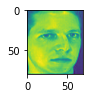

In [112]:
pyplot.subplot(311)
pyplot.imshow(loaded_images[0])

<div dir="rtl">
<span> 

### مشاهده داده ها با Seaborn، داده های Noise
طبیعتا باید داده های Noise را حذف کنیم ولی اینکه اینکار رو بکنیم یا نکنیم با توجه هدف تمرین مشخص نیست.

(کار درست این هست که حذف کنیم، و من میدونم)

</span>
</div>

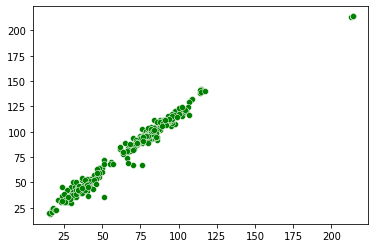

In [113]:
import seaborn as sns

sns.scatterplot(x=reshaped_images[:,0], y=reshaped_images[:,1], c =["green"])

<div dir="rtl">
<span> 

## بررسی KMeans, Custom rand score

</span>
</div>



<div dir="rtl">
<span> 

### بررسی KMeans
از تابع موجود در کتابخانه sklearn استفاده می کنیم.

</span>
</div>

In [114]:
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=0).fit(reshaped_images) # Default is 8 clusters

# Other numbers of clusters observed in the improvement (last) section 

<div dir="rtl">
<span> 

### پیاده سازی rand index
با استفاده از تابعی که برای rand index در اسلاید های درس و کلاس مطرح شد و روش به دست آوردن بخش های مختلف آن به صورت تک به تک و جایگذاری در فرمول در مرحله نهایی، این تابع را به صورت دستی پیاده سازی می کنیم.

تابع را برای بررسی نتیجه اجرای الگوریتم KMeans استفاده می کنیم.
</span>
</div>

In [115]:
from scipy.special import comb

def rand_score_custom(labels_pred, labels_true):
  tp_fn = comb(np.bincount(labels_true), 2).sum()
  tp_fp = comb(np.bincount(labels_pred), 2).sum()
  x = np.c_[(labels_pred, labels_true)]
  tp = sum(comb(np.bincount(x[x[:, 0] == i, 1]), 2)
    .sum() for i in set(labels_pred))
  fn = tp_fn - tp
  fp = tp_fp - tp
  tn = comb(len(x), 2) - tp - fp - fn
  result = (tp + tn) / (tp + fp + fn + tn)
  return result

rand_score_custom(kmeans.labels_, labels)

0.8548869938577136

<div dir="rtl">
<span> 

### بررسی درستی rand index
از تابع rand_score که در کتابخانه sklearn موجود است استفاده می کنیم تا درستی تابعی که خودمان به صورت custom پیاده سازی کردیم را بررسی کنیم. این تابع را برای بررسی نتیجه KMeans استفاده می کنیم و همانطور که می بینید این مقدار با مقدار قبلی ای که با تابع custom به دست آورده ایم مطابقت دارد.
</span>
</div>

In [116]:
from sklearn.metrics.cluster import rand_score
rand_score(kmeans.labels_, labels)

0.8548869938577136

<div dir="rtl">
<span> 

### Seaborn plot
</span>
</div>

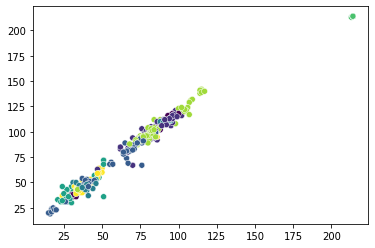

In [117]:
sns.scatterplot(x=reshaped_images[:,0], y=reshaped_images[:,1], c =kmeans.labels_)

<div dir="rtl">
<span> 

## بررسی DBSCAN
از تابع موجود در کتابخانه sklearn استفاده می کنیم.

</span>
</div>

In [118]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2000, min_samples=1).fit(reshaped_images)

In [119]:
rand_score_custom(dbscan.labels_, labels)

0.98518695211402

<div dir="rtl">
<span> 

### Seaborn plot
</span>
</div>

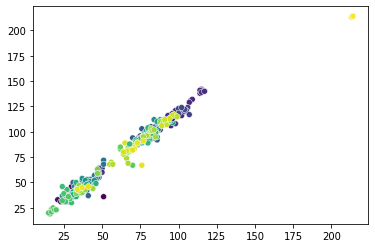

In [120]:
sns.scatterplot(x=reshaped_images[:,0], y=reshaped_images[:,1], c =dbscan.labels_)

<div dir="rtl">
<span> 

## بررسی Agglomerative (average linkage)
از تابع موجود در کتابخانه sklearn استفاده می کنیم.

</span>
</div>

In [121]:
from sklearn.cluster import AgglomerativeClustering

agg_average = AgglomerativeClustering(affinity='euclidean',linkage='average', distance_threshold=2900, n_clusters=None, compute_full_tree= True).fit(reshaped_images)
rand_score_custom(agg_average.labels_, labels)

0.9852108056532888

<div dir="rtl">
<span> 

### Seaborn plot
</span>
</div>

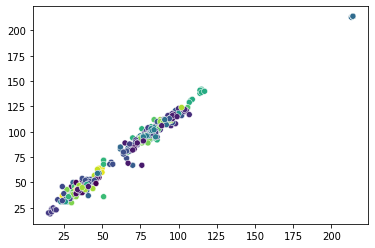

In [122]:
sns.scatterplot(x=reshaped_images[:,0], y=reshaped_images[:,1], c =agg_average.labels_)

<div dir="rtl">
<span> 

## بررسی Agglomerative (single linkage)
از تابع موجود در کتابخانه sklearn استفاده می کنیم.

</span>
</div>

In [123]:
agg_single = AgglomerativeClustering(affinity='euclidean',linkage='single', distance_threshold=2000, n_clusters=None, compute_full_tree= True).fit(reshaped_images)
rand_score_custom(agg_single.labels_, labels)

0.98518695211402

<div dir="rtl">
<span> 

### Seaborn plot
</span>
</div>

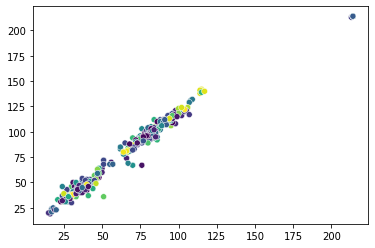

In [124]:
sns.scatterplot(x=reshaped_images[:,0], y=reshaped_images[:,1], c =agg_single.labels_)

<div dir="rtl">
<span> 

## بررسی Agglomerative (complete linkage)
از تابع موجود در کتابخانه sklearn استفاده می کنیم.

</span>
</div>

In [125]:
agg_complete = AgglomerativeClustering(affinity='euclidean',linkage='complete', distance_threshold=2900, n_clusters=None, compute_full_tree= True).fit(reshaped_images)
rand_score_custom(agg_complete.labels_, labels)

0.9863319219989266

<div dir="rtl">
<span> 

### Seaborn plot
</span>
</div>

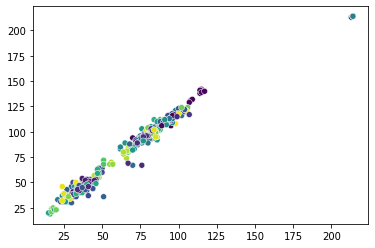

In [126]:
sns.scatterplot(x=reshaped_images[:,0], y=reshaped_images[:,1], c =agg_complete.labels_)

<div dir="rtl">
<span> 

## بهبود الگوریتم KMeans
از تابع موجود در کتابخانه sklearn استفاده می کنیم.

همانطور که در درس هم گفته شد یکی از نقاط ضعف الگوریتم KMeans دردسر تعیین پارامتر k هست که در الگوریتم های دیگری که معرفی شد این دردسر کمتر مشاهده می شود و تعیین پارامتر های آنها آسان تر است. 

راه حل پیشنهادی برای حل این مشکل تعیین پارامتر ها برای الگوریتمی دیگر مانند الگوریتم agglomerative و سپس استفاده از تعداد کلاستر برای اجرای الگوریتم KMeans است.
با بررسی داده های مختلف موفق بودن این روش را در شرایط گوناگون بررسی می کنیم.

انجام Overclustering به دلیل تاکید مرتب استاد بر استفاده از آن است.</span>
</div>

<div dir="rtl">
<span> 

### اجرای الگوریتم KMeans با 8 کلاستر که مقدار default است

</span>
</div>

In [127]:
kmeans = KMeans(random_state=0).fit(reshaped_images)
rand_score_custom(kmeans.labels_, labels)

0.8548869938577136

<div dir="rtl">
<span> 

### روش پیشنهادی

</span>
</div>

In [128]:
agg_complete = AgglomerativeClustering(affinity='euclidean',linkage='complete', distance_threshold=4000, n_clusters=None, compute_full_tree= True).fit(reshaped_images)

kmeans = KMeans(n_clusters = agg_complete.n_clusters_ * 2, random_state=0).fit(reshaped_images)
rand_score_custom(kmeans.labels_, labels)

0.9859025582920866

<div dir="rtl">
<span> 

### روش بهینه (با دانستن عدد 41)

</span>
</div>

In [129]:
kmeans = KMeans(82, random_state=0).fit(reshaped_images)
rand_score_custom(kmeans.labels_, labels)

0.9876080863498121

<div dir="rtl">
<span> 

### روش پیشنهادی n_clusters

</span>
</div>

In [130]:
agg_complete.n_clusters_ * 2

62

<div dir="rtl">
<span> 

### روش بهینه n_clusters

</span>
</div>

In [131]:
82

82

<div dir="rtl">
<span> 

### Agglomerativeی که اجرا کردیم به تنهایی

</span>
</div>

In [132]:
agg_complete = AgglomerativeClustering(affinity='euclidean',linkage='complete', distance_threshold=4000, n_clusters=None, compute_full_tree= True).fit(reshaped_images)
rand_score_custom(agg_complete.labels_, labels)

0.9591865943109309

<div dir="rtl">
<span> 

### آزمایش با Agglomerative های مختلف (پارامتر های متنوع)

</span>
</div>

In [133]:
agg_complete = AgglomerativeClustering(affinity='euclidean',linkage='complete', distance_threshold=7000, n_clusters=None, compute_full_tree= True).fit(reshaped_images)
kmeans = KMeans(n_clusters = agg_complete.n_clusters_ * 2, random_state=0).fit(reshaped_images)
rand_score_custom(kmeans.labels_, labels)

0.6439024390243903

In [134]:
agg_complete = AgglomerativeClustering(affinity='euclidean',linkage='complete', distance_threshold=6000, n_clusters=None, compute_full_tree= True).fit(reshaped_images)
kmeans = KMeans(n_clusters = agg_complete.n_clusters_ * 2, random_state=0).fit(reshaped_images)
rand_score_custom(kmeans.labels_, labels)

0.8859562287554416

In [135]:
agg_complete = AgglomerativeClustering(affinity='euclidean',linkage='complete', distance_threshold=5000, n_clusters=None, compute_full_tree= True).fit(reshaped_images)
kmeans = KMeans(n_clusters = agg_complete.n_clusters_ * 2, random_state=0).fit(reshaped_images)
rand_score_custom(kmeans.labels_, labels)

0.9563599499075676

In [136]:
agg_complete = AgglomerativeClustering(affinity='euclidean',linkage='complete', distance_threshold=3000, n_clusters=None, compute_full_tree= True).fit(reshaped_images)
kmeans = KMeans(n_clusters = agg_complete.n_clusters_ * 2, random_state=0).fit(reshaped_images)
rand_score_custom(kmeans.labels_, labels)

0.9818951636949133

<div dir="rtl">
<span> 

### آزمایش با Agglomerative های مختلف (پارامتر های متنوع) - خود Agglomerative به تنهایی

</span>
</div>

In [137]:
agg_complete = AgglomerativeClustering(affinity='euclidean',linkage='complete', distance_threshold=7000, n_clusters=None, compute_full_tree= True).fit(reshaped_images)
rand_score_custom(agg_complete.labels_, labels)

0.06971196851332817

In [138]:
agg_complete = AgglomerativeClustering(affinity='euclidean',linkage='complete', distance_threshold=6000, n_clusters=None, compute_full_tree= True).fit(reshaped_images)
rand_score_custom(agg_complete.labels_, labels)

0.6587154869103703

In [139]:
agg_complete = AgglomerativeClustering(affinity='euclidean',linkage='complete', distance_threshold=5000, n_clusters=None, compute_full_tree= True).fit(reshaped_images)
rand_score_custom(agg_complete.labels_, labels)

0.8361261852227324

In [140]:
agg_complete = AgglomerativeClustering(affinity='euclidean',linkage='complete', distance_threshold=3000, n_clusters=None, compute_full_tree= True).fit(reshaped_images)
rand_score_custom(agg_complete.labels_, labels)

0.9866897250879599

<div dir="rtl">
<span> 

### نتیجه نهایی

**نتیجه 1:** توانستیم با تعیین پارامتر های الگوریتم Agglomerative که مشخص کردنشان ساده تر از تعیین k است به نتیجه ای با دقت **بسیار نزدیک** به نتیجه اجرای الگوریتم با kیی بهینه (41*2) که 2 برای overclustering است برسیم.

**یاداوری**: انجام overclustering بخاطر توصیه های مرتب استاد به انجام آن است.

**نتیجه 2**: با آزمایش کردن پارامتر های متعدد برای الگوریتم Agglomerative به این نتیجه رسیدیم که در اغلب موارد به نتیجه بهتری نسبت به اجرای الگوریتم Agglomerative به تنهایی می رسیم (در بسیاری موارد با اختلاف بسیار).
همچنین در مواقعی که به نتیجه بدتری رسیدیم با اختلاف بسیار ناچیزی بود.

برای **جمعبندی**، مشخص شد استفاده از این روش بسیار به صرفه تر از تعیین مستقیم K است (با توجه به وقت صرفه جویی شده و نزدیکی نتیجه به نتیجه ای با دانستن تعداد کلاستر واقعی یعنی 41).
همچنین نشان داده شد با پارامتر های متعدد برای الگوریتم Agglomerative به جواب های بسیار خوبی رسیدیم که به طور کلی بهتر از استفاده از روش Agglomerative به صورت تنها بود.

**توجه**: این مطالعات با توجه به اینکه باید در چارچوب دیتاست تمرین باشند روی یک دیتاست انجام شده و ممکن است مطالعات دیگر روی دیتاست هایی که ساختار متفاوتی دارند به نتیجه های متفاوت (عملکرد بهتر یا بدتر) برسند.
</span>
</div>